# Robot-run cafe in Los Angeles

Project description:

The goal is to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so attracting investors is what's needed, and they’re interested in the current market conditions.

Our goal is to prepare some market research based on open-source data on restaurants in LA and to determine whether it will be possible to maintain cafe's success when the novelty of robot waiters wears off.

## Preparing data for analysis

In [1]:
# loading the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import scipy.stats as stats
!pip install -U kaleido

In [2]:
# loading the dataset
df = pd.read_csv('/datasets/rest_data_us.csv')

In [3]:
# looking at the genral info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [4]:
# looking at the 1st 5 rows of the df
df.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


Table description:
- object_name — establishment name
- chain — chain establishment (TRUE/FALSE)
- object_type — establishment type
- address — address
- number — number of seats

In [5]:
# renaming column "number" to "no_of_seats"
df.rename(columns = {'number':'no_of_seats'}, inplace = True)

In [6]:
# checking whether there are any missing values
df.isnull().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
no_of_seats    0
dtype: int64

In [7]:
# looking at how many establishments belong to a chain
df['chain'].value_counts()

False    5972
True     3676
Name: chain, dtype: int64

In [8]:
# checking the rows with missing values
df[df['chain'].isnull()]

,id,object_name,address,chain,object_type,no_of_seats
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [9]:
# querying rows that include JAMMIN in name
df[df['object_name'].str.contains("JAMMIN")]

,id,object_name,address,chain,object_type,no_of_seats
6790,18576,WI JAMMIN CAFE,1359 S REDONDO BLVD,False,Restaurant,28
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1


It appears there are no other establishments that could relate to JAMMIN JIMMY'S PIZZA

In [10]:
# querying rows that include CARNALES in name
df[df['object_name'].str.contains("CARNALES")]

,id,object_name,address,chain,object_type,no_of_seats
6419,18205,TACOS LOS CARNALES,4370 S CENTRAL AVE,False,Fast Food,47
6624,18410,TACOS LOS 3 CARNALES,5000 WHITTIER BLVD,False,Fast Food,6
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
9616,21402,TACOS LOS 4 CARNALES,5000 WHITTIER BLVD,False,Fast Food,9


It seems odd that all of these taco places have the same address (except the 1st one). Perhaps, there are 3 different / separate places with different seating indeed.

In [11]:
# querying rows that include LEXINGTON in name
df[df['object_name'].str.contains("LEXINGTON")]

,id,object_name,address,chain,object_type,no_of_seats
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


We shall rather avoid changing the missing value for these places since we cannot really determine and assume whether they are part of chains or not.

In [12]:
# looking at how many unique addresses there are
df['address'].describe()

count                    9651
unique                   8517
top       3607 TROUSDALE PKWY
freq                       11
Name: address, dtype: object

In [13]:
# checking for duplicates
df.duplicated().sum()

0

In [14]:
# checking how many establishments are there of each type
df['object_type'].value_counts()

Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: object_type, dtype: int64

Most popular establishment types appear to be restaurants and Fast Food places.

In [15]:
# looking at the most popular establishments
df['object_name'].value_counts().head(10)

THE COFFEE BEAN & TEA LEAF    47
SUBWAY                        31
DOMINO'S PIZZA                15
WABA GRILL                    14
KENTUCKY FRIED CHICKEN        14
TRIMANA                       13
MCDONALD'S                    13
PAPA JOHN'S PIZZA             12
STARBUCKS                     12
YOGURTLAND                    12
Name: object_name, dtype: int64

Most popular establishments appear to be: The Coffee Bean & Tea Leaf, Subway and Domino's Pizza.

In [16]:
# looking at number of seats distribution
df['no_of_seats'].describe()

count    9651.000000
mean       43.695161
std        47.622874
min         1.000000
25%        14.000000
50%        27.000000
75%        46.000000
max       229.000000
Name: no_of_seats, dtype: float64

Looks like usually establishments have 14 - 46 seats.

## Analyzing the data

In [17]:
# grouping df by object type and counting each object by type
types = df.groupby(['object_type']).agg({'object_type': 'count'})
# renaming columns
types.columns=['number_of_establishments']
# sorting types in descending order
types = types.sort_values(by='number_of_establishments', ascending=False)

In [18]:
types

,number_of_establishments
object_type,
Restaurant,7255
Fast Food,1066
Cafe,435
Pizza,320
Bar,292
Bakery,283


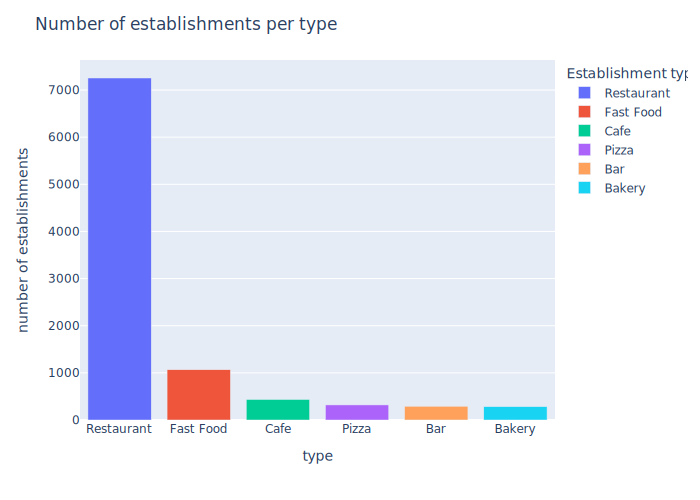

In [19]:
# plotting a bar plot of number of establishments per type
fig = px.bar(types, x=types.index, y='number_of_establishments', color=types.index)
fig.update_layout(
    title="Number of establishments per type",
    xaxis_title="type",
    yaxis_title="number of establishments",
    legend_title="Establishment type",
)
fig.show("svg")

Most common establishment type is restaurant. There are quite many fast food places as well. However, bakeries are the least common.

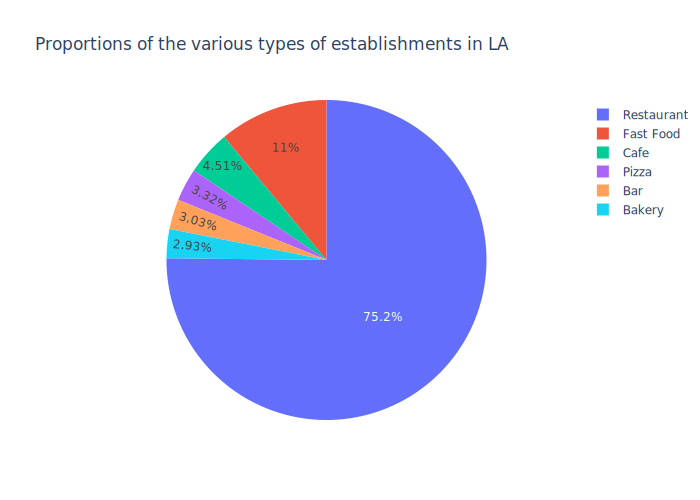

In [20]:
# creating a pie chart that shows proportions of the various types of establishments
fig = px.pie(types, values='number_of_establishments', names=types.index, title='Proportions of the various types of establishments in LA')
fig.show("svg")

Restaurants make up 75% of establishments, fast food places - 11%, cafes - 4.51%, while bakeries only 2.93%.

In [21]:
# grouping df by chains
chains = df.groupby(['chain']).agg({'chain': 'count'})
# renaming columns
chains.columns=['number_of_establishments']
# adding a new column for non-chain and chain establishments
chains['grouped'] = ["non-chain", "chain"]

In [22]:
chains

,number_of_establishments,grouped
chain,,
False,5972,non-chain
True,3676,chain


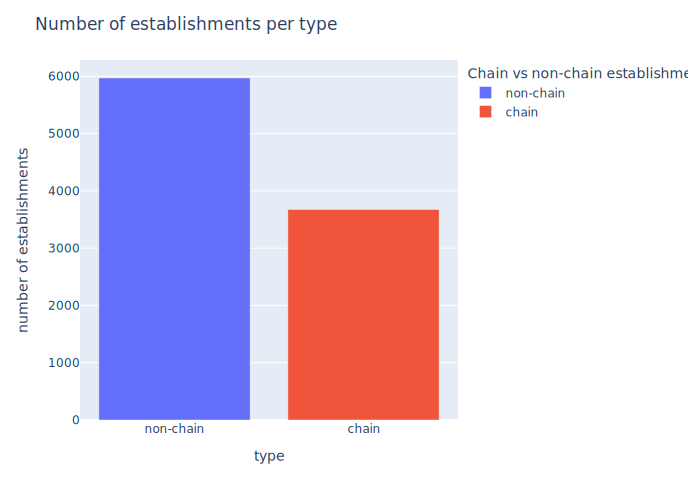

In [23]:
# plotting a bar chart that shows the amount of chain vs non-chain establishments
fig = px.bar(chains, x="grouped", y='number_of_establishments', color="grouped")

fig.update_layout(
    title="Number of establishments per type",
    xaxis_title="type",
    yaxis_title="number of establishments",
    legend_title="Chain vs non-chain establishments",
    
)

fig.show("svg")

Majority - 5972 of establishments are non-chain, while 3676 are part of a chain.

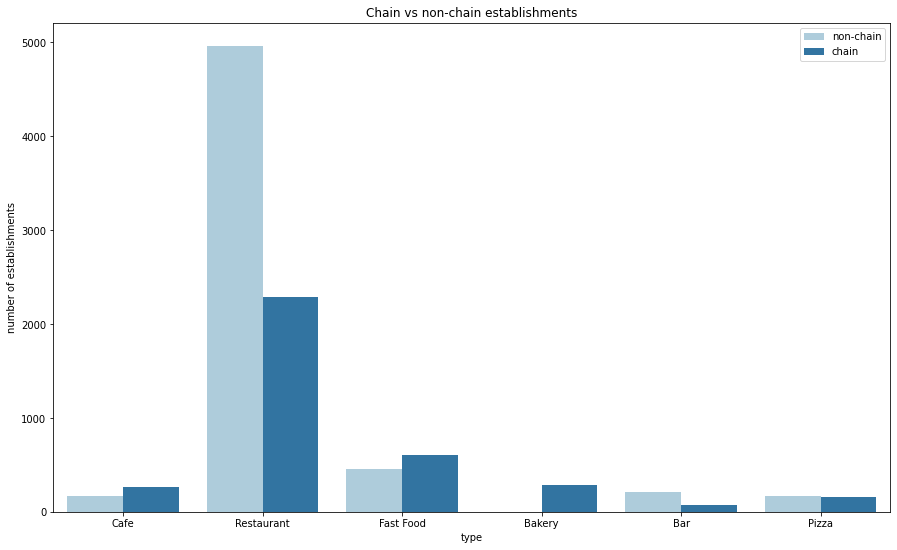

In [24]:
# plotting a graph that shows chain and non-chain establishments based on object type
plt.figure(figsize=(15, 9))
ax = sns.countplot(x="object_type", hue="chain", data=df, palette='Paired')
plt.title('Chain vs non-chain establishments')
plt.xlabel('type')
plt.ylabel('number of establishments')
plt.legend(labels=["non-chain","chain"]);

There are half as more non-chain restaurants than ones that are part of a chain. When it comes to fast food places, it seems chain establishments are more common. Bakeries are exclusively part of chains and cafes lean more towards being part of chains as well.

In [25]:
# filtering establishments that are part of a chain
chain_true = df.query('chain==True')

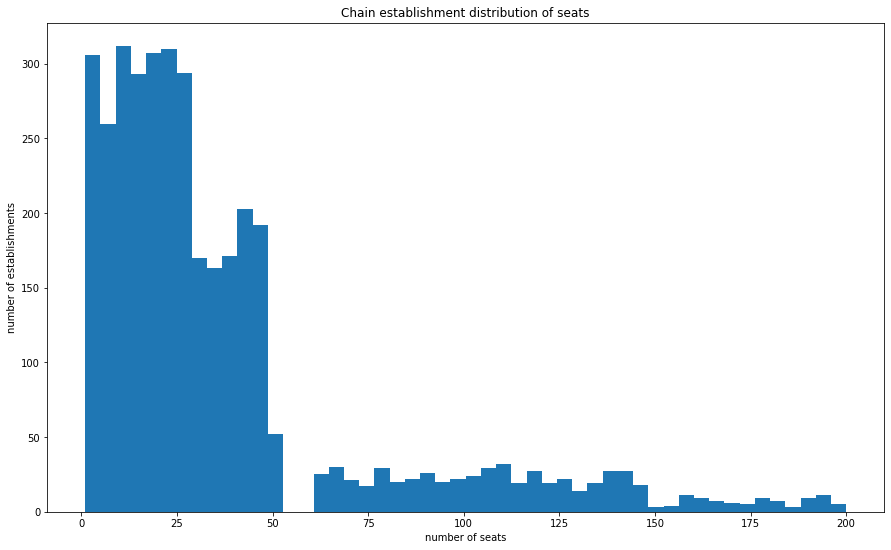

In [26]:
# plotting distribution of seats for chain establishments
plt.figure(figsize=(15,9))
plt.hist(chain_true['no_of_seats'], bins=50, range=(1,200))
plt.title('Chain establishment distribution of seats')
plt.xlabel('number of seats')
plt.ylabel('number of establishments')
plt.show()

In [27]:
chain_true['no_of_seats'].describe()

count    3676.000000
mean       39.694233
std        43.437212
min         1.000000
25%        13.000000
50%        25.000000
75%        44.000000
max       229.000000
Name: no_of_seats, dtype: float64

In [28]:
np.percentile(chain_true['no_of_seats'], [90, 95, 99])

array([107.  , 140.  , 206.25])

In 50% of cases chain establishments have 13 to 44 seats. Not more than 10% have more than 107 seats.

In [29]:
# creating a pivot table with average amount of seats for each type of establishment
type_avg = df.pivot_table(index='object_type', values='no_of_seats')

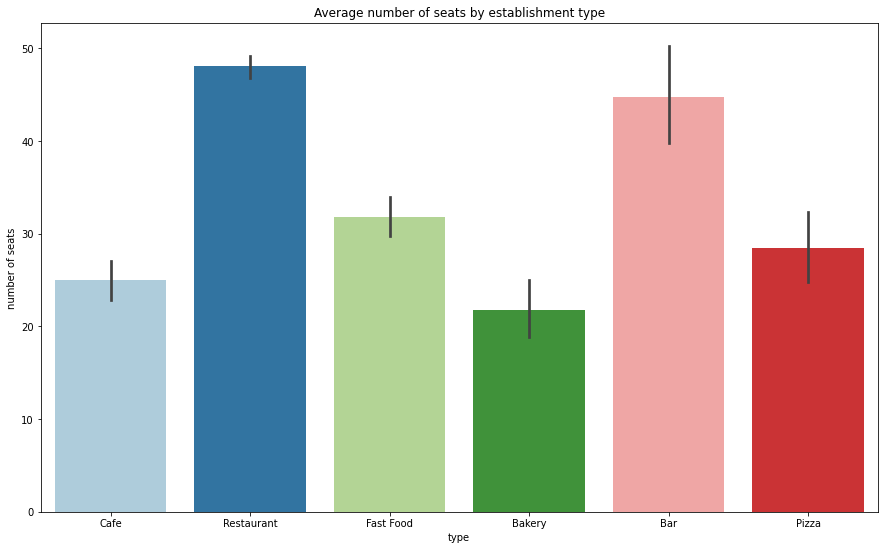

In [30]:
# plotting a graph of average amount of seats for each type of establishment
plt.figure(figsize=(15,9))
ax = sns.barplot(x='object_type', y='no_of_seats', data=df, palette="Paired")
plt.title('Average number of seats by establishment type')
plt.xlabel('type')
plt.ylabel('number of seats')
plt.xticks(rotation = 0);

In [31]:
type_avg.sort_values(by='no_of_seats', ascending = False)

,no_of_seats
object_type,
Restaurant,48.042316
Bar,44.767123
Fast Food,31.837711
Pizza,28.459375
Cafe,25.000000
Bakery,21.773852


On average, restaurants have 48 seats, fast food places - 31, cafes - 25 and bakeries - 21.

In [32]:
# creating a new column that contains only street name
df['street'] = (df['address']
                        .replace('^[0-9 ]+','', regex=True)
                        .replace('[0-9 #-]+$','', regex=True)
                         )

In [33]:
# looking at unique street names
df.street.describe()

count              9651
unique             1771
top       W SUNSET BLVD
freq                306
Name: street, dtype: object

In [34]:
# creating a df of top 10 streets that have most amount of establishments
ten_streets = df['street'].value_counts().head(10).reset_index()
ten_streets.columns = ['street', 'no_of_establishments']

In [35]:
ten_streets

,street,no_of_establishments
0,W SUNSET BLVD,306
1,W PICO BLVD,305
2,WILSHIRE BLVD,223
3,HOLLYWOOD BLVD,197
4,SANTA MONICA BLVD,192
5,S WESTERN AVE,187
6,W 3RD ST,177
7,S FIGUEROA ST,173
8,S VERMONT AVE,169
9,W OLYMPIC BLVD,156


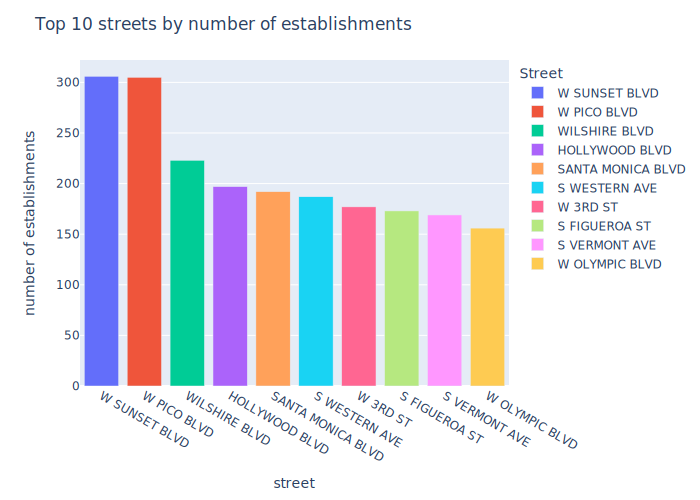

In [36]:
# plotting a graph of the top ten streets by number of establishments
fig = px.bar(ten_streets, x='street', y='no_of_establishments', color = 'street')
fig.update_layout(
    title="Top 10 streets by number of establishments",
    xaxis_title="street",
    yaxis_title="number of establishments",
    legend_title="Street",
)

fig.show("svg")

These 10 streets are top 1% when it comes to number of establishments per street.

W Sunset Blvd has highest amount of establishments - 306, following W Pico Blvd with 305, Wilshire Blvd - 223.
The rest of the streets have between 156 - 197 establishments.

In [37]:
np.percentile(df['street'].value_counts(), [90, 95, 99])

array([ 8., 22., 86.])

In [38]:
# creating a small df of number of establishments on the street
count = df['street'].value_counts().reset_index()
count.columns = ['street', 'no_of_establishments']

In [39]:
count.head()

,street,no_of_establishments
0,W SUNSET BLVD,306
1,W PICO BLVD,305
2,WILSHIRE BLVD,223
3,HOLLYWOOD BLVD,197
4,SANTA MONICA BLVD,192


In [40]:
# counting unique streets
count['street'].count()

1771

In [41]:
# filtering streets with only 1 establishment
one_establishment = count.query('no_of_establishments == 1')

In [42]:
# counting 1 establishment streets
one_establishment['street'].count()

1150

In [43]:
one_ratio = one_establishment['street'].count() / count['street'].count()
print("{0:.2f}".format(one_ratio))

0.65


There are 1771 unique streets total, 1150 (or 65%) of those have only 1 establishment.

In [44]:
# merging count df with no_of_establishments column to the initial df
df = df.merge(count, on='street')

In [45]:
df.head()

,id,object_name,address,chain,object_type,no_of_seats,street,no_of_establishments
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD,3
1,14044,MEDITERRANEAN TRIANGLE,4917 N EAGLE ROCK BLVD,False,Restaurant,10,N EAGLE ROCK BLVD,3
2,15613,DEL TACO # 1193,4903 N EAGLE ROCK BLVD,True,Fast Food,1,N EAGLE ROCK BLVD,3
3,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY,80
4,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100,WORLD WAY,80


In [46]:
df.query('street.isin(@ten_streets.street)')

,id,object_name,address,chain,object_type,no_of_seats,street,no_of_establishments
83,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD,197
84,11841,RALPHS MARKET #206,5429 HOLLYWOOD BLVD,False,Restaurant,22,HOLLYWOOD BLVD,197
85,11874,BOLT,5648 HOLLYWOOD BLVD,False,Restaurant,45,HOLLYWOOD BLVD,197
86,11885,JAPAN HOUSE LA 2ND FLOOR,6801 HOLLYWOOD BLVD #213 -221,False,Restaurant,28,HOLLYWOOD BLVD,197
87,11886,SHAKE SHACK,6201 HOLLYWOOD BLVD,True,Restaurant,3,HOLLYWOOD BLVD,197
...,...,...,...,...,...,...,...,...
5474,21237,HALO TOP ICE CREAM,10250 SANTA MONICA BLVD # 2815,False,Restaurant,3,SANTA MONICA BLVD,192
5475,21384,GOOD PEOPLE COFFEE CO,11609 SANTA MONICA BLVD,False,Cafe,2,SANTA MONICA BLVD,192
5476,21391,YAMAKASE,11901 SANTA MONICA BLVD # 111,True,Restaurant,22,SANTA MONICA BLVD,192
5477,21411,EAT THIS CAFE,6545 SANTA MONICA BLVD,False,Restaurant,41,SANTA MONICA BLVD,192


In [47]:
# filtering top 10 busiest streets
busiest_streets = df.query('street in @ten_streets.street')

In [48]:
busiest_streets['no_of_seats'].describe()

count    2085.000000
mean       46.909353
std        48.968545
min         1.000000
25%        15.000000
50%        29.000000
75%        48.000000
max       229.000000
Name: no_of_seats, dtype: float64

Average number of seats on these streets is 46. In 50% of cases establishments on these streets have 15 - 48 seats.

In [49]:
# filtering only restaurants on the busiest streets
rest_on_top_streets = busiest_streets.query('object_type == "Restaurant"')

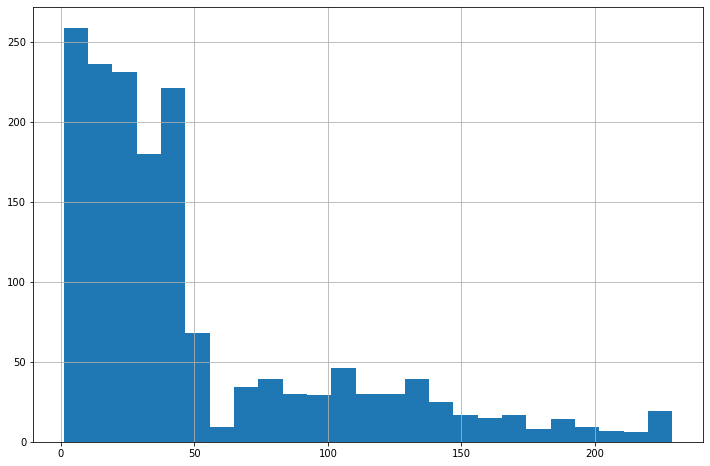

In [50]:
# looking at the overall distribution of seats in restaurants on busiest streets
rest_on_top_streets['no_of_seats'].hist(bins=25, figsize=(12,8));

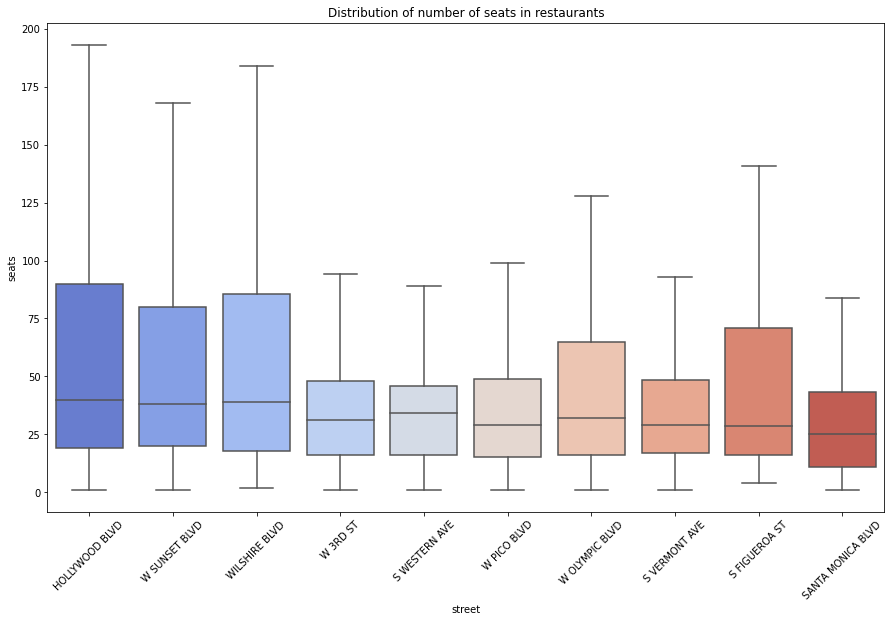

In [51]:
# building a boxplot for number of seats of all restaurants on top 10 busiest streets
plt.figure(figsize=(15,9))
sns.boxplot(x = 'street', y ='no_of_seats',data = rest_on_top_streets, showfliers = False, palette='coolwarm')
plt.title('Distribution of number of seats in restaurants')
plt.xlabel('street')
plt.ylabel('seats')
plt.xticks(rotation=45);

In [52]:
rest_on_top_streets.groupby(['street'])['no_of_seats'].describe()

,count,mean,std,min,25%,50%,75%,max
street,,,,,,,,
HOLLYWOOD BLVD,161.0,60.683230,57.135084,1.0,19.00,40.0,90.00,229.0
S FIGUEROA ST,126.0,52.388889,53.406512,4.0,16.25,28.5,70.75,226.0
S VERMONT AVE,123.0,48.349593,51.657762,1.0,17.00,29.0,48.50,226.0
S WESTERN AVE,145.0,46.386207,45.390158,1.0,16.00,34.0,46.00,198.0
SANTA MONICA BLVD,144.0,38.250000,43.177549,1.0,10.75,25.0,43.25,225.0
W 3RD ST,145.0,45.144828,43.279290,1.0,16.00,31.0,48.00,174.0
W OLYMPIC BLVD,139.0,53.489209,57.066370,1.0,16.00,32.0,65.00,226.0
W PICO BLVD,230.0,44.100000,42.886297,1.0,15.00,29.0,49.00,205.0
W SUNSET BLVD,225.0,55.542222,52.331441,1.0,20.00,38.0,80.00,229.0


There are 1618 restaurants on top 10 busiest streets. 

In 50% of cases number of seats vary between 16 - 67.

However, these numbers differ by streets, e.g., on W 3rd St common would be 16 - 48 seats, but on Hollywood Blvd there will be more: 19 - 90 seats.

In [53]:
# filtering fast food joints on the top 10 streets
fast_on_top_streets = busiest_streets.query('object_type == "Fast Food"')

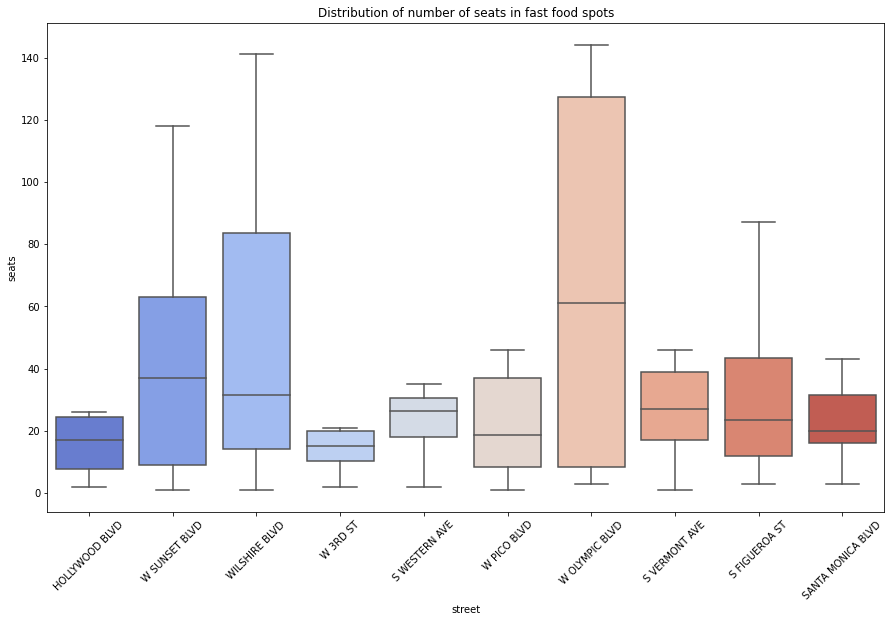

In [54]:
# building a boxplot for number of seats of all fast food places on top 10 busiest streets
plt.figure(figsize=(15,9))
sns.boxplot(x = 'street', y ='no_of_seats',data = fast_on_top_streets, showfliers = False, palette='coolwarm')
plt.title('Distribution of number of seats in fast food spots')
plt.xlabel('street')
plt.ylabel('seats')
plt.xticks(rotation=45);

In [55]:
fast_on_top_streets.groupby(['street'])['no_of_seats'].describe()

,count,mean,std,min,25%,50%,75%,max
street,,,,,,,,
HOLLYWOOD BLVD,10.0,32.600000,44.751660,2.0,7.75,17.0,24.50,145.0
S FIGUEROA ST,26.0,35.884615,34.956346,3.0,11.75,23.5,43.50,147.0
S VERMONT AVE,29.0,45.793103,53.332769,1.0,17.00,27.0,39.00,227.0
S WESTERN AVE,16.0,36.312500,36.888514,2.0,18.00,26.5,30.50,135.0
SANTA MONICA BLVD,15.0,33.333333,47.134559,3.0,16.00,20.0,31.50,199.0
W 3RD ST,10.0,15.900000,11.751596,2.0,10.25,15.0,20.00,43.0
W OLYMPIC BLVD,6.0,68.166667,66.360882,3.0,8.25,61.0,127.25,144.0
W PICO BLVD,26.0,32.423077,39.606235,1.0,8.25,18.5,37.00,144.0
W SUNSET BLVD,25.0,45.680000,46.048634,1.0,9.00,37.0,63.00,195.0


There are noticeably less (177) fast food joints on the top 10 busiest streets than there are restaurants. In 50% of cases, seats will be between 11 - 43.

The number of seats greatly depend on the street the fast food joint is located at.

W Olympic Blvd typically would have bigger range of seats, from 8 - 127, but it also has less fast food places than other streets. On the W 3rd St the number of seats often will be way lower: 10 - 20.

In [56]:
# filtering cafes
cafe_on_top_streets = busiest_streets.query('object_type == "Cafe"')

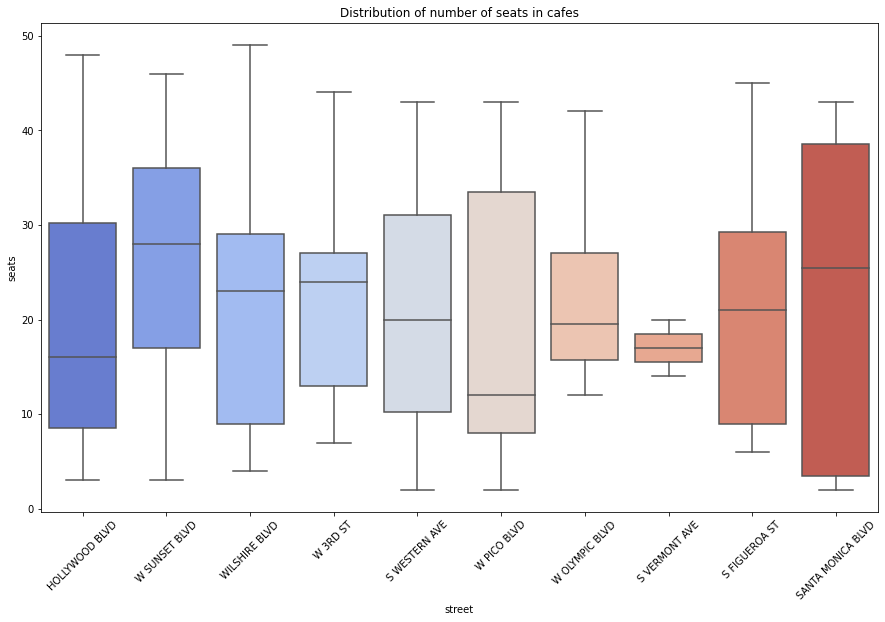

In [57]:
# building a boxplot for number of seats of all cafes on top 10 busiest streets
plt.figure(figsize=(15,9))
sns.boxplot(x = 'street', y ='no_of_seats',data = cafe_on_top_streets, showfliers = False, palette='coolwarm')
plt.title('Distribution of number of seats in cafes')
plt.xlabel('street')
plt.ylabel('seats')
plt.xticks(rotation=45);

In [58]:
cafe_on_top_streets.groupby(['street'])['no_of_seats'].describe()

,count,mean,std,min,25%,50%,75%,max
street,,,,,,,,
HOLLYWOOD BLVD,8.0,21.000000,17.549929,3.0,8.50,16.0,30.25,48.0
S FIGUEROA ST,6.0,21.666667,15.108497,6.0,9.00,21.0,29.25,45.0
S VERMONT AVE,2.0,17.000000,4.242641,14.0,15.50,17.0,18.50,20.0
S WESTERN AVE,4.0,21.250000,17.745892,2.0,10.25,20.0,31.00,43.0
SANTA MONICA BLVD,10.0,21.900000,17.628575,2.0,3.50,25.5,38.50,43.0
W 3RD ST,5.0,23.000000,14.265343,7.0,13.00,24.0,27.00,44.0
W OLYMPIC BLVD,4.0,23.250000,13.149778,12.0,15.75,19.5,27.00,42.0
W PICO BLVD,11.0,19.545455,15.756672,2.0,8.00,12.0,33.50,43.0
W SUNSET BLVD,21.0,24.761905,12.957256,3.0,17.00,28.0,36.00,46.0


There are 82 cafes on the busiest streets. Often the amount of seats will be between 8 - 33, but again, that can depend on the street.

Most cafes are on W Sunset Blvd and there seats usually vary from 17 - 36.

## Conclusions and findings

#### Overall:

Out of 9651 LA's establishments, restaurants make up 75%, fast food places - 11%, cafes - 4.51%, while bakeries only 2.93%.

Majority - 5972 of establishments are non-chain, while 3676 are part of a chain.

There are half as more non-chain restaurants than ones that are part of a chain. When it comes to fast food places, it seems chain establishments are more common. Bakeries are exclusively part of chains and cafes lean more towards being part of chains as well.

In 50% of cases chain establishments have 13 to 44 seats. Not more than 10% have more than 107 seats.

On average, restaurants have 48 seats, fast food places - 31, cafes - 25 and bakeries - 21.

There are 1771 unique streets total, 1150 (or 65%) of those have only 1 establishment within the whole street.

#### Top 10 streets:
10 streets with highest amount of establishments in LA:
*  W SUNSET BLVD
*  W PICO BLVD
*  WILSHIRE BLVD
*  HOLLYWOOD BLVD
*  SANTA MONICA BLVD
*  S WESTERN AVE
*  W 3RD ST
*  S FIGUEROA ST
*  S VERMONT AVE
*  W OLYMPIC BLVD

These 10 streets are top 1% when it comes to number of establishments per street.

W Sunset Blvd has highest amount of establishments - 306, following W Pico Blvd with 305, Wilshire Blvd - 223. The rest of the streets have between 156 - 197 establishments.

Average number of seats on these streets is 46. In 50% of cases establishments on these streets have 15 - 48 seats.

There are 1618 restaurants on top 10 busiest streets.

In 50% of cases number of seats vary between 16 - 67.

However, these numbers differ by streets, e.g., on W 3rd St common would be 16 - 48 seats, but on Hollywood Blvd there will be more: 19 - 90 seats.

There are noticeably less (177) fast food joints on the top 10 busiest streets than there are restaurants. In 50% of cases, seats will be between 11 - 43.

The number of seats greatly depend on the street the fast food joint is located at.

W Olympic Blvd typically would have bigger range of seats, from 8 - 127, but it also has less fast food places than other streets. On the W 3rd St the number of seats often will be way lower: 10 - 20.

There are 82 cafes on the busiest streets. Often the amount of seats will be between 8 - 33, but again, that can depend on the street.

Most cafes are on W Sunset Blvd and there seats usually vary from 17 - 36.

### Recommendations

It is worth considering opening an establishment on one of the busiest streets in LA as the concept of robot-run cafe or a restaurant would gain a lot of attraction not only by locals, but tourists as well. Choosing such area with plenty of daily tourists from all over the world, would make it possible to maintain cafe's success, the novelty of robot waiters wouldn't wear off for a good while.

A restaurant, fast food joint or a cafe would be a great option since these types are most common, however opening a restaurant might require more resources as they typically have more seats, also serving at a restaurant might be more complex and involve more steps, so it depends on robot's capabilties.

Overall, a small cafe, with 10 - 20 seats would be optimal considering rent and the rest of resources required for this project. Later on this project could develop into a chain.

Presentation: <https://drive.google.com/file/d/10Z3s4KjyhGN7N3uzgeu83EdhWmGLSIS-/view?usp=drive_link> 
